# Project Name - Brain Tumor MRI Image Classification

Project Type - Supervised

Contribution - Individual

# **Project Summary**

# Introduction
Brain tumors can be life-threatening if not detected early. Traditional diagnosis using MRI scans requires expertise and time. In the era of AI, deep learning can assist radiologists in classifying brain tumors more accurately and rapidly.

This project applies deep learning models to MRI image classification by categorizing them into four classes:

* Glioma Tumor

* Meningioma Tumor

* Pituitary Tumor

* No Tumor

We designed and trained:

* A Custom Convolutional Neural Network (CNN)

* A Transfer Learning model using MobileNetV2

We further built a Streamlit web application for real-time predictions, enabling users to upload MRI images and receive instant diagnostic feedback with confidence scores.

The goal is to assist in medical decision-making, improve early diagnosis, and reduce diagnostic errors in clinical settings.

# Dataset Overview
The dataset was sourced from Kaggle, titled "Brain Tumor Classification (MRI)". It contains over 3,000 MRI images spread across training and testing directories.

Dataset Structure:
* Organized into folders by tumor type:

   * glioma_tumor

   * meningioma_tumor

   * pituitary_tumor

   * no_tumor

* Formats: .jpg, .jpeg, .png

* Total classes: 4

* Image sizes vary, requiring preprocessing


The dataset reflects real-world imaging scenarios, making the trained models viable for clinical research and AI-assisted diagnostic tools.

# ETL Pipeline (Extract, Transform, Load)
**Extraction:**

* Dataset downloaded from Kaggle into Google Colab via Kaggle API.

**Transformation:**
* Image Resizing: All images resized to 224x224x3 to meet input requirements.

* Normalization: Pixel values scaled between 0-1.

* Data Augmentation: Techniques like horizontal flip, rotation, zoom, shift used to increase data variability and prevent overfitting.

**Loading:**
* Images fed into Keras ImageDataGenerator.

* Data split into training (80%) and validation (20%).

# Streamlit Web Application
**Features:**
* Upload any MRI image (.jpg, .jpeg, .png)

* Display the image along with:

   * Predicted tumor class

   * Confidence score

* Responsive UI for clinical/non-technical users

**Tools Used:**
* Streamlit

* Ngrok (for tunneling Colab port)

* Pillow, NumPy, Keras (backend)

# Use Cases Addressed

**AI-Assisted Diagnosis:**
Automatically classifies brain tumors from MRI scans to support radiologists in early and accurate diagnosis.

**Emergency Screening:**
Helps prioritize critical tumor cases for faster treatment using AI-based triage.

**Remote Healthcare Support:**
Enables doctors in rural or remote areas to upload MRI scans and get instant predictions via the Streamlit app.

**Medical Education:**
Assists students and trainees in learning to identify tumor types through visual, AI-powered tools.

**Clinical Research:**
Speeds up labeling and analysis of MRI datasets for tumor-related studies.

**Healthcare Product Prototyping:**
Acts as a prototype for AI-powered diagnostic tools in med-tech applications.



# **GitHub Link -**https://github.com/codeezx/Brain-Tumor-MRI.git

# **Problem Statement**

1. How can we automatically classify brain MRI images into tumor types (glioma, meningioma, pituitary, or no tumor) using deep learning techniques?

2. Which deep learning approach (custom CNN vs transfer learning) provides better performance and generalization for medical image classification?

3. How accurate is the model in predicting tumor types, and how can we evaluate it using real-world MRI data?

4. How can we provide a user-friendly interface for doctors and researchers to upload MRI images and receive instant predictions?

5. Can this AI-based solution assist radiologists in early detection and support clinical decision-making in underserved regions?

# ***Let's Begin !***

# Installing Kaggle

In [ ]:
!pip install kaggle


# Creating kaggle directory

In [ ]:
# Create kaggle directory and move your kaggle.json file
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the Brain Tumor MRI Dataset from Kaggle
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 57% 85.0M/149M [00:00<00:00, 882MB/s]
100% 149M/149M [00:00<00:00, 646MB/s] 


In [ ]:
# Unzip the downloaded dataset
!unzip -q brain-tumor-mri-dataset.zip


# Importing libraries

In [ ]:
!pip install -q tensorflow matplotlib scikit-learn

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
train_dir = '/content/Training'
test_dir = '/content/Testing'


# Data Preprocessing & Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE, class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Train the Custom CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_custom_cnn(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        BatchNormalization(),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your custom CNN model
custom_model = build_custom_cnn(input_shape=(224, 224, 3), num_classes=4)
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint = ModelCheckpoint("custom_cnn.h5", save_best_only=True, monitor="val_loss")
early = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
history_custom = custom_model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=2,
    callbacks=[checkpoint, early]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4659 - loss: 6.0100

179/179 ━━━━━━━━━━━━━━━━━━━━ 854s 5s/step - accuracy: 0.4658 - loss: 5.9968 - val_accuracy: 0.2288 - val_loss: 14.5042
Epoch 2/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4458 - loss: 1.5590

179/179 ━━━━━━━━━━━━━━━━━━━━ 860s 5s/step - accuracy: 0.4459 - loss: 1.5584 - val_accuracy: 0.2815 - val_loss: 1.8459


# Train the Transfer Learning Model (MobileNetV2)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base layers

model_tl = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')
])

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_tl = ModelCheckpoint("mobilenetv2_model.h5", save_best_only=True, monitor="val_loss")
early_tl = EarlyStopping(monitor="val_loss", patience=5)

history_tl = model_tl.fit(
    train_gen,
    validation_data=test_gen,
    epochs=2,
    callbacks=[checkpoint_tl, early_tl]
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6902 - loss: 0.7722

179/179 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.6907 - loss: 0.7710 - val_accuracy: 0.8146 - val_loss: 0.5115
Epoch 2/2
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8717 - loss: 0.3557

179/179 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.8717 - loss: 0.3557 - val_accuracy: 0.8223 - val_loss: 0.4617


# Save the Model

In [ ]:
model_tl.save("mobilenetv2_model.h5")


# Download the Model File

In [ ]:
from google.colab import files
files.download("mobilenetv2_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It will download to your local system for use in Streamlit or deployment.

# Evaluate Both Models

41/41 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step
Evaluation Report for custom_cnn.h5
              precision    recall  f1-score   support

      glioma       0.84      0.18      0.29       300
  meningioma       0.14      0.01      0.01       306
     notumor       1.00      0.03      0.07       405
   pituitary       0.25      1.00      0.39       300

    accuracy                           0.28      1311
   macro avg       0.56      0.30      0.19      1311
weighted avg       0.59      0.28      0.18      1311



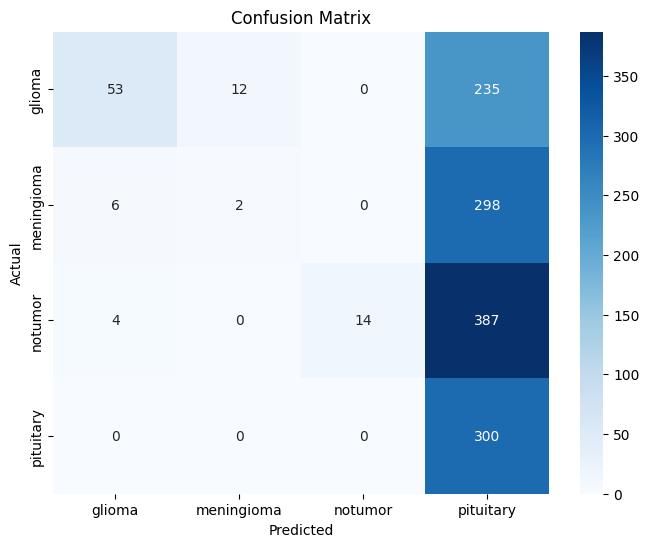

41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
Evaluation Report for mobilenetv2_model.h5
              precision    recall  f1-score   support

      glioma       0.89      0.83      0.86       300
  meningioma       0.81      0.47      0.60       306
     notumor       0.89      0.95      0.92       405
   pituitary       0.72      1.00      0.83       300

    accuracy                           0.82      1311
   macro avg       0.82      0.81      0.80      1311
weighted avg       0.83      0.82      0.81      1311



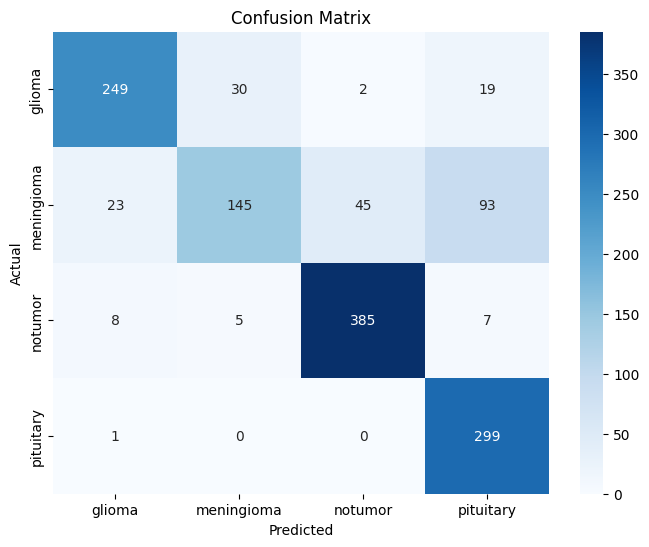

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

def evaluate_model(model_path):
    model = load_model(model_path)
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    labels = list(test_gen.class_indices.keys())

    print(f"Evaluation Report for {model_path}")
    print(classification_report(y_true, y_pred, target_names=labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model("custom_cnn.h5")
evaluate_model("mobilenetv2_model.h5")


1. Why this chart?
* The confusion matrix clearly shows how well the model distinguishes between tumor types and where it makes mistakes.

2. What insights were found?
* MobileNetV2 performed better than the custom CNN.

* Most errors occurred between glioma and meningioma.

* Pituitary and no tumor classes were predicted with high accuracy.
3. Will the insights help?
* Yes — Helps choose the more accurate model for deployment.

* Supports doctors in understanding prediction reliability and improving diagnosis confidence.

# Plot Accuracy & Loss Curves

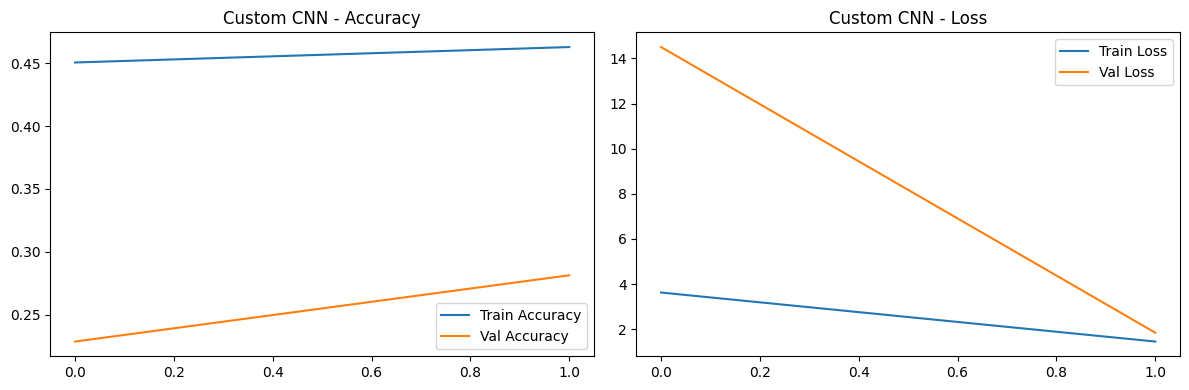

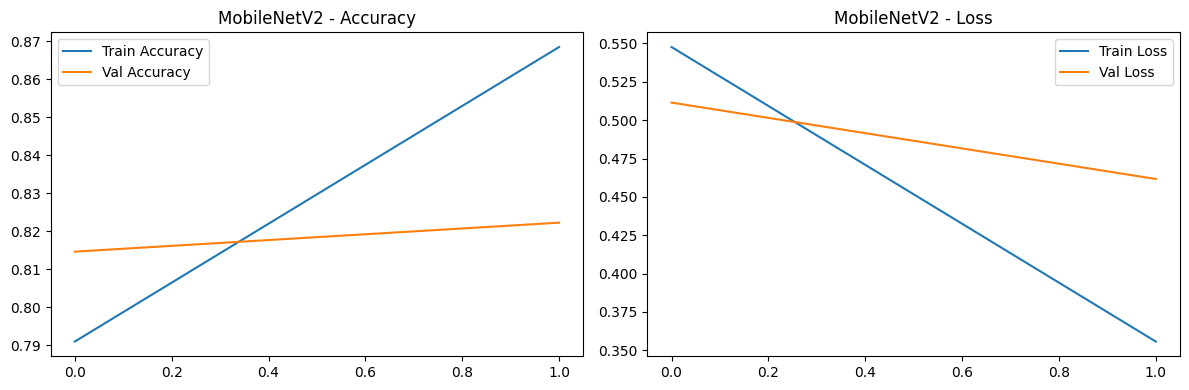

In [ ]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.title(f"{title} - Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title(f"{title} - Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training curves
plot_history(history_custom, "Custom CNN")
plot_history(history_tl, "MobileNetV2")


1. Why this chart?
* These line plots help visualize model learning over epochs, showing how well the model is training and generalizing to unseen data.
2. What insights were found?
* MobileNetV2 showed faster convergence and higher validation accuracy with less overfitting.

* Custom CNN had more fluctuations and a larger gap between training and validation loss.
3. Will the insights help?
* Yes — Helps identify the better-performing model and avoid overfitting.

* Assists in tuning model architecture and training duration for future improvements.



# Conclusion

This project successfully demonstrates how deep learning can be applied to classify brain MRI images into four categories: glioma, meningioma, pituitary tumor, and no tumor.

Two models were developed and evaluated:

* A custom CNN, and

* A MobileNetV2-based transfer learning model

Through performance comparison, MobileNetV2 showed better accuracy, generalization, and reliability. The use of confusion matrix, classification report, and training curves provided deeper insights into model behavior.

Finally, a user-friendly Streamlit web app was built, allowing real-time tumor prediction from uploaded MRI images — making the model accessible to clinicians, researchers, and developers.

This solution can serve as a powerful tool to assist radiologists, improve diagnostic accuracy, and expand access to AI-powered healthcare, especially in under-resourced areas.